In [2]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import svm
import datetime
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import statsmodels.api as sm

import itertools
import optuna

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import arima_model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [3]:
wb1 = openpyxl.load_workbook(r"data_sheets\Книга1.xlsx")
sheet = wb1['Лист4']

2000 2000


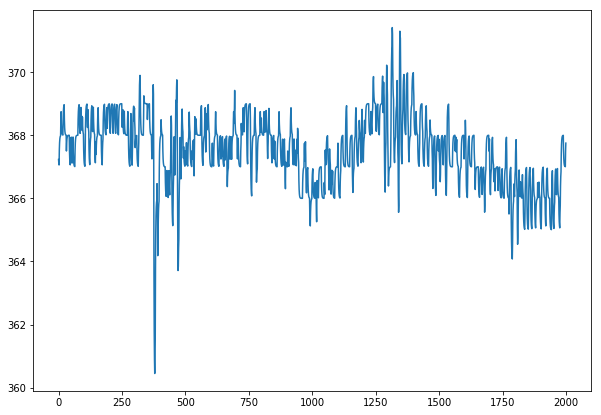

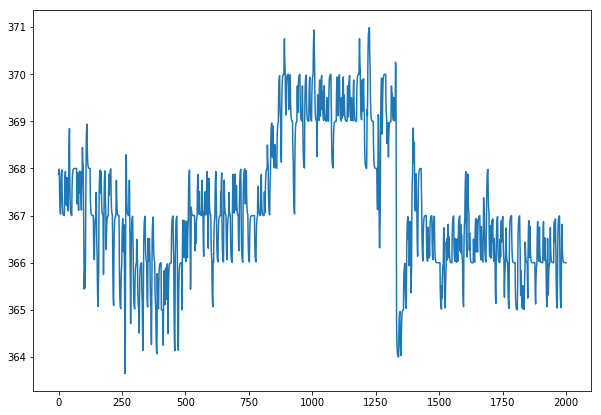

In [4]:
start = datetime.datetime.now()
timer_train = []
timer_test = []
batch_train = []
batch_test = []
n = 4000
border = 6000
num = 8000
for i in range (0, border-n):
    timer_train.append(sheet.cell(row = i+n, column = 8).value)
    batch_train.append(float(sheet.cell(row = i+n, column = 2).value))
for j in range (border-n, num-n):
    timer_test.append(sheet.cell(row = i+n, column = 8).value)
    batch_test.append(float(sheet.cell(row = j+n, column = 2).value))
print(len(batch_train), len(batch_test))
plt.plot(batch_train)
plt.show()
plt.plot(batch_test)
plt.show()

    

1999


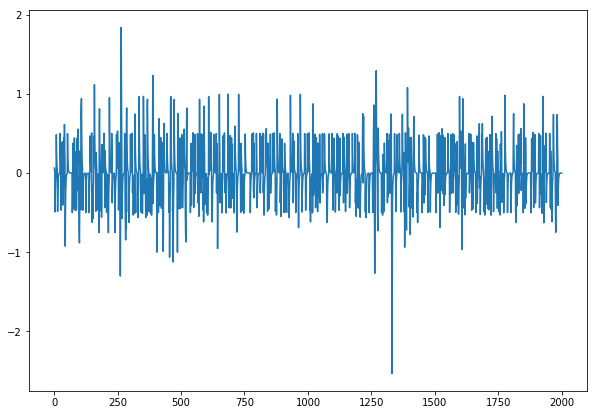

In [28]:
df1 =  pd.DataFrame(columns = ["flow1", "time"])
df1.time = timer_train
df1.flow1 = batch_train
df1['time'] = df1['time'].diff()
df1['flow1'] = df1['flow1'].diff()
df1.dropna(inplace = True)
print(len(df1))
plt.plot(df2['flow1'])

In [11]:
df2 =  pd.DataFrame(columns = ["flow1", "time"])
df2.time = timer_test
df2.flow1 = batch_test
df2['time'] = df2['time'].diff()
df2['flow1'] = df2['flow1'].diff()
df2.dropna(inplace = True)
print(len(df2))

1999


In [ ]:
model1 = SARIMAX(df1['flow1'], exog = df2['flow1'], order=(1, 1, 1), seasonal_order=(2, 1, 1, 18))
result1 = model1.fit()

prog_start = 0

pred1 = result1.get_prediction(start = prog_start, dynamic = False)
forecast_values1 = pred1.predicted_mean

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
difference = np.mean(forecast_values1 - df2['flow1'])
forecast_mse1 = np.sqrt(((forecast_values1 - df2['flow1']) ** 2).mean())
print(forecast_mse1, difference)

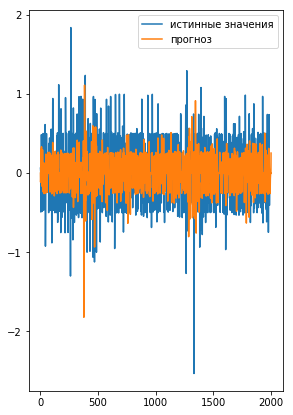

In [29]:
#forecast_mse1 = ((forecast_values1 - batch_test) ** 2).mean()
    
figure = pylab.subplot(1,2,2)
figure1 = pylab.plot(df2['flow1'], label = "истинные значения")
figure2 = pylab.plot(forecast_values1, label = "прогноз")
pylab.legend()

In [31]:
def params_optimization(dataset, dataset_test, seasonal, non_seasonal, cycles):
    for i in range (10, cycles):
        seasonal[3] = i
        try:
            model1 = SARIMAX(df1['flow1'], exog = df2['flow1'], order=(1, 1, 1), seasonal_order=(1, 0, 1, i))
            result1 = model1.fit()
        except:
            continue
        pred1 = result1.get_prediction(start = prog_start, dynamic = False)
        forecast_values1 = pred1.predicted_mean
        difference = np.mean(forecast_values1 - dataset_test)
        forecast_mse_temp = np.sqrt(((forecast_values1 - dataset_test) ** 2).mean())
        print(seasonal, difference, forecast_mse_temp)  
    return [difference, forecast_mse_temp]
    

In [33]:
params_non_seasonal = [1, 1, 1]
params_seasonal = [2, 1, 1, 10]
print(params_optimization(df1, df2['flow1'], params_seasonal, params_non_seasonal, 27))


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 10] 0.0018344763403980368 0.35932506602660536


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 11] 0.0018306376685771606 0.35941900945642213


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 12] 0.0018254021159836503 0.3592073975076353


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 13] 0.0018254462290571026 0.3602353449993188


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 14] 0.0018101302351649997 0.3596157030795496


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 15] 0.0018154076875835704 0.35948313849822144


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 16] 0.0017974049826212245 0.35974430667771007


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 17] 0.0017997137241307145 0.3597474960595494


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 18] 0.00177347547152955 0.35939431346848844


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 19] 0.0018598494472333573 0.35987348507075956


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 20] 0.001810884739616134 0.359676033959208


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 21] 0.0018197546310909298 0.3596708737330905


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 22] 0.0018383647301886828 0.3598379504003809


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 23] 0.0018071507692810024 0.359857494970529


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 24] 0.0018121521039046232 0.3595102910717807


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 25] 0.0018136699014611856 0.35951358087275104


C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[2, 1, 1, 26] 0.0017851452197353904 0.35951147618429835
[0.0017851452197353904, 0.35951147618429835]


In [12]:
print(params_seasonal, params_non_seasonal)

[2, 1, 1, 10] [1, 1, 1]
